# Assignment
# 🏨 Hotel Reservation Cancellation - Neural Network Challenge

## 🧩 Problem Description

Hotel managers often face a serious challenge: **last-minute reservation cancellations**. Predicting whether a reservation will be canceled in advance helps optimize room availability, reduce losses, and improve customer service.

In this assignment, you’ll build a **binary classification model** using an **Artificial Neural Network (ANN)** to predict **whether a hotel reservation will be canceled** based on various features like booking time, number of guests, room type, deposit type, and more.

---

## 🎯 Learning Goals

This assignment is designed not just to build an accurate model, but to **deeply understand how model architecture and training strategies affect performance**. You'll:

- Learn how underfitting and overfitting look on real data.
- Use regularization techniques (Dropout, EarlyStopping).
- Simplify architectures to control model complexity.
- Try **Batch Normalization** and assess its impact.

---

## 🛠️ Your Tasks

1. **Preprocess the Data**
   - Load the hotel reservation dataset (Already down for you below).
   - Handle missing values, encode categorical variables, and scale numeric features.
   - split data into train/validation/test splits

2. **Build a Baseline ANN Model**
   - Use a simple architecture to establish a baseline.
   - Evaluate performance on validation and test sets.

3. **Generate Underfitting**
   - Intentionally create an **underfit** model (e.g., one small hidden layer, too few epochs).
   - Plot the training vs validation loss/accuracy.
   - 📌 **Fix it** by increasing model capacity or training time.

4. **Generate Overfitting**
   - Create a model that **overfits** (e.g., too many layers, too wide, too long training).
   - Plot and analyze the gap between training and validation performance.
   - 📌 **Fix it using:**
     - Dropout layers
     - EarlyStopping callback
     - Reducing complexity (fewer neurons/layers)

5. **Experiment with Batch Normalization**
   - Add BatchNormalization layers.
   - Compare training dynamics with and without it over the same number of epochs.

6. **Summarize What You Learned**
   - Write a short reflection on:
     - How you diagnosed each problem (underfit/overfit)
     - Which solution worked best and why
     - What advice you'd give your past self about designing ANN architectures for tabular data

---

## 📊 Metrics to Use

- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- Visuals of training/validation accuracy & loss

---

## 📦 Deliverables

- Your well-commented code (Jupyter or Colab notebook on Github)
- Short written reflections as markdown cells
- Visualizations and explanation of decisions


## Load the data

In [117]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

print('Data source import complete.')

Data source import complete.


In [118]:
import pandas as pd

hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')

# 1- **Preprocessing**

In [119]:
hotel.value_counts()

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   0                No Deposit    9.0    333.0    0                     Transient-Party  100.75  0                            0                          Check-Out           2016-10-21                 7
Resort Hotel  0            24         2015               November            45                        3                          3                        10                    1       0.0       0       BB    FRA      Corporate       Corporate             0                  0                       0                               A                   A                   2                No Deposit    334.0  281.0    0                     Transient-Party  40.00   0                            0                          Check-Out           2015-11-16                 5
                           36         2015               November            45                        7                          2                        6                     1       0.0       0       BB    DEU      Corporate       Corporate             0                  0                       0                               A                   A                   1                No Deposit    185.0  281.0    0                     Transient-Party  36.00   0                            0                          Check-Out           2015-11-15                 4
                                                                                                                                                                                                                 AUT      Corporate       Corporate             0                  0                       0                               A                   A                   1                No Deposit    185.0  281.0    0                     Transient-Party  36.00   0                            0                          Check-Out           2015-11-15                 3
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   1                No Deposit    9.0    333.0    0                     Transient-Party  100.75  0                            0                          Check-Out           2016-10-21                 2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ..
Resort Hotel  1

In [120]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [121]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [122]:
hotel = hotel.drop(columns=['company'])

In [123]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
df = hotel.copy()

# Label encoding
label_cols = ['arrival_date_month', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # ensure all values are strings for dates or mixed types

# One-hot encoding
onehot_cols = [
    'hotel', 'meal','country', 'market_segment', 'distribution_channel',
    'deposit_type', 'customer_type', 'reservation_status'
]

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [124]:
df.shape

(119390, 222)

In [125]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume df is your fully encoded DataFrame and 'target_column' is your label
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split: Train+Val and Test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split: Train and Val (75% / 25% of remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Resulting proportions:
# - Train: 60% (0.8 * 0.75)
# - Val: 20% (0.8 * 0.25)
# - Test: 20%

# 🔧 Step 1: Median Imputation
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# 🔧 Step 2: Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 2- **Baseline ANN Model**

In [126]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(256, activation='relu'), #1
    layers.Dense(128, activation='relu'), #2
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.9411 - loss: 0.1717 - val_binary_accuracy: 0.9978 - val_loss: 0.0162
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - binary_accuracy: 0.9983 - loss: 0.0111 - val_binary_accuracy: 0.9970 - val_loss: 0.0249
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - binary_accuracy: 0.9987 - loss: 0.0108 - val_binary_accuracy: 0.9986 - val_loss: 0.0096
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - binary_accuracy: 0.9989 - loss: 0.0062 - val_binary_accuracy: 0.9992 - val_loss: 0.0057
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - binary_accuracy: 0.9991 - loss: 0.0049 - val_binary_accuracy: 0.9987 - val_loss: 0.0096
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.9992 - loss: 0.0043 - val_binary_accuracy: 0.9989 - val_loss: 0.0059
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - binary_accuracy: 0.9993 - loss: 0.0034 - val_binary_accuracy: 0.9994 - val_loss: 0.0035
Epoch 

Best Validation Loss: 0.0035
Best Validation Accuracy: 0.9996


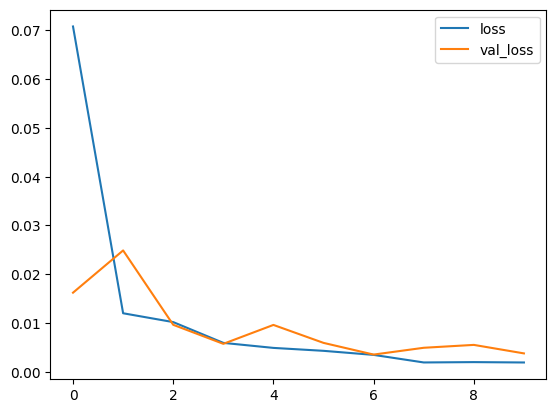

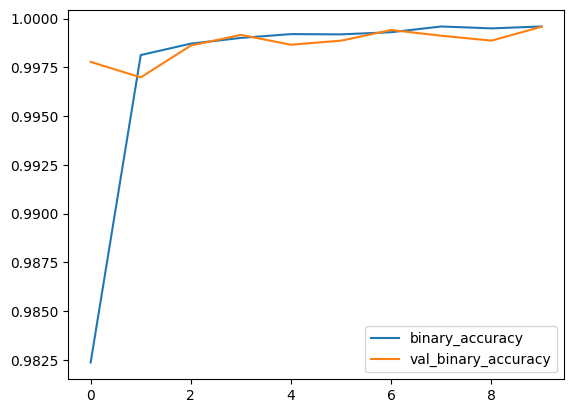

In [127]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

def evaluate_and_display(X, y_true, set_name="Set"):
    # Predict probabilities & convert to class labels
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    y_true = y_true.to_numpy().flatten()

    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n📊 {set_name} Performance Metrics:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{set_name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Test Set Performance Metrics:
Accuracy:  0.9993
Precision: 0.9986
Recall:    0.9997
F1 Score:  0.9991

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



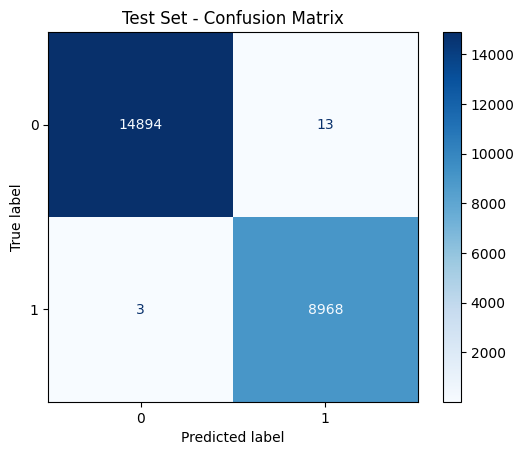

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Validation Set Performance Metrics:
Accuracy:  0.9996
Precision: 0.9993
Recall:    0.9995
F1 Score:  0.9994

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15140
           1       1.00      1.00      1.00      8738

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



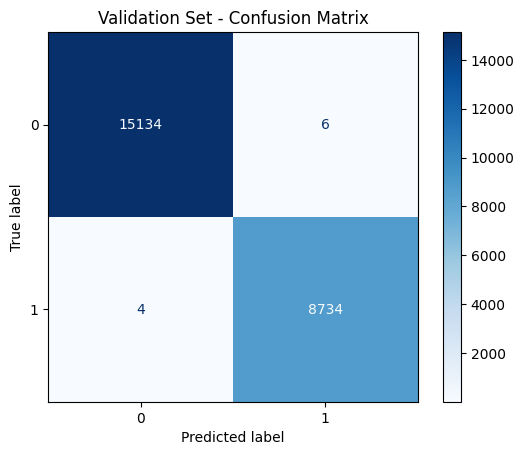

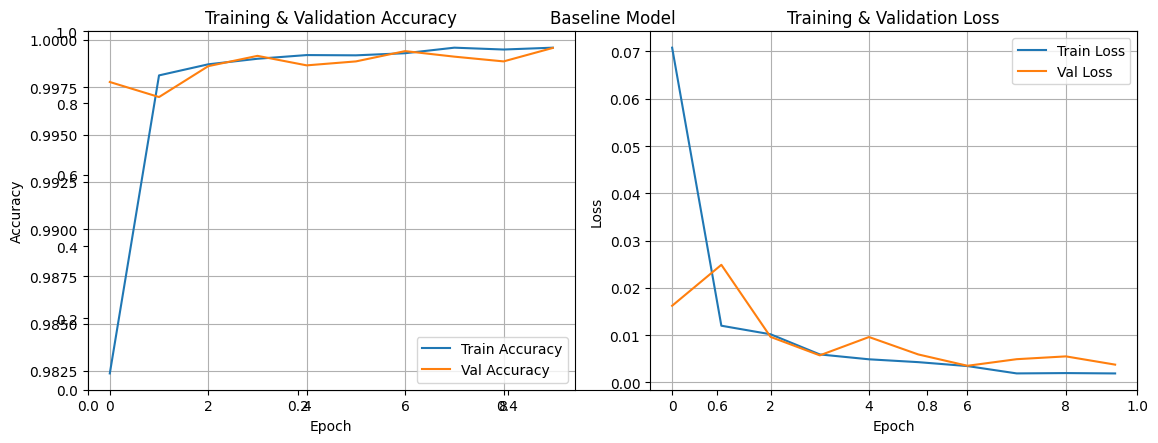

In [129]:
# 📍 Evaluate on Test Set
evaluate_and_display(X_test, y_test, "Test Set")

# 📍 Evaluate on Validation Set
evaluate_and_display(X_val, y_val, "Validation Set")

# 📈 Plot Training & Validation Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.title('Baseline Model')
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 3- Generate Underfitting

In [130]:
model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=2,
)

Epoch 1/2
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.8708 - loss: 0.3573 - val_binary_accuracy: 0.9930 - val_loss: 0.0406
Epoch 2/2
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.9941 - loss: 0.0337 - val_binary_accuracy: 0.9952 - val_loss: 0.0184


747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Test Set Performance Metrics:
Accuracy:  0.9946
Precision: 0.9866
Recall:    0.9991
F1 Score:  0.9928

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     14907
           1       0.99      1.00      0.99      8971

    accuracy                           0.99     23878
   macro avg       0.99      1.00      0.99     23878
weighted avg       0.99      0.99      0.99     23878



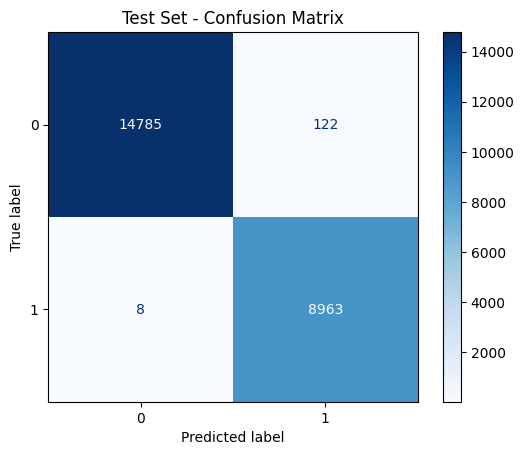

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Validation Set Performance Metrics:
Accuracy:  0.9952
Precision: 0.9879
Recall:    0.9992
F1 Score:  0.9935

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     15140
           1       0.99      1.00      0.99      8738

    accuracy                           1.00     23878
   macro avg       0.99      1.00      0.99     23878
weighted avg       1.00      1.00      1.00     23878



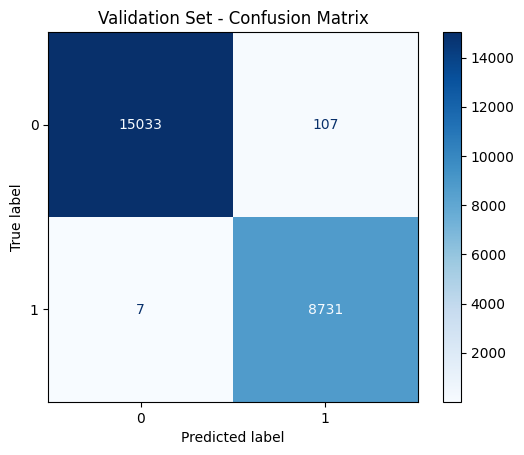

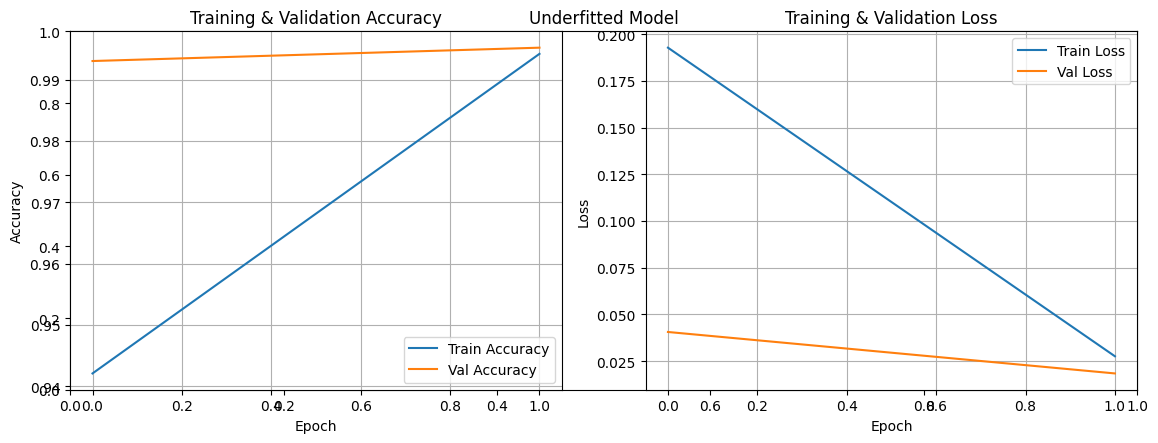

In [131]:
# 📍 Evaluate on Test Set
evaluate_and_display(X_test, y_test, "Test Set")

# 📍 Evaluate on Validation Set
evaluate_and_display(X_val, y_val, "Validation Set")

# 📈 Plot Training & Validation Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.title('Underfitted Model')
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3- Generate Overfitting

In [132]:
model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - binary_accuracy: 0.9588 - loss: 0.1304 - val_binary_accuracy: 0.9973 - val_loss: 0.0083
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - binary_accuracy: 0.9976 - loss: 0.0058 - val_binary_accuracy: 0.9965 - val_loss: 0.0097
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - binary_accuracy: 0.9976 - loss: 0.0066 - val_binary_accuracy: 0.9969 - val_loss: 0.0095
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - binary_accuracy: 0.9984 - loss: 0.0042 - val_binary_accuracy: 0.9981 - val_loss: 0.0050
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - binary_accuracy: 0.9983 - loss: 0.0038 - val_binary_accuracy: 0.9988 - val_loss: 0.0054
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - binary_accuracy: 0.9988 - loss: 0.0033 - val_binary_accuracy: 0.9985 - val_loss: 0.0053
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - binary_accuracy: 0.9987 - loss: 0.0033 - val_binary_accuracy: 0.9978 - val_loss:

747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

📊 Test Set Performance Metrics:
Accuracy:  0.9992
Precision: 0.9987
Recall:    0.9991
F1 Score:  0.9989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



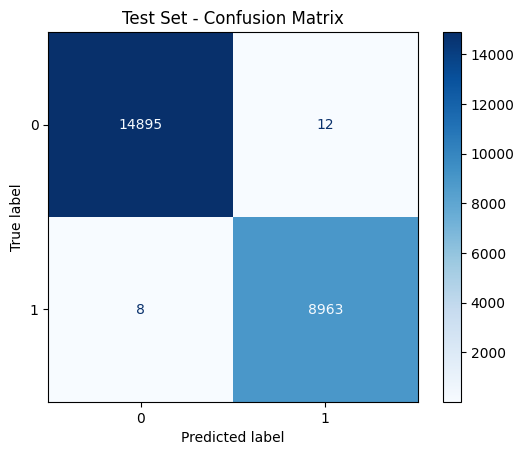

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

📊 Validation Set Performance Metrics:
Accuracy:  0.9992
Precision: 0.9993
Recall:    0.9986
F1 Score:  0.9990

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15140
           1       1.00      1.00      1.00      8738

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



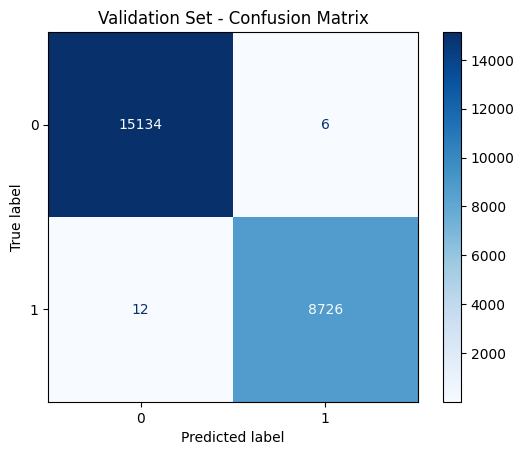

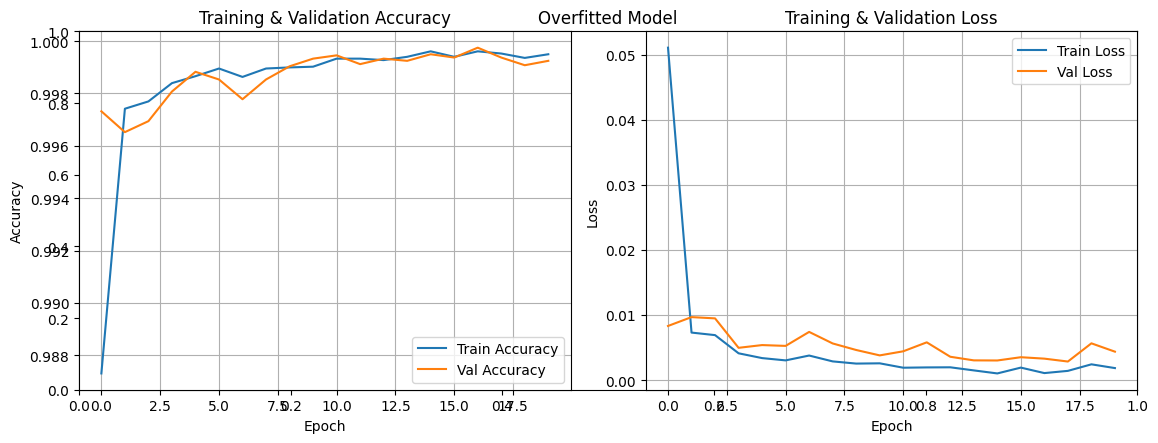

In [133]:
# 📍 Evaluate on Test Set
evaluate_and_display(X_test, y_test, "Test Set")

# 📍 Evaluate on Validation Set
evaluate_and_display(X_val, y_val, "Validation Set")

# 📈 Plot Training & Validation Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.title('Overfitted Model')
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Overfitted Model Fix

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=20,
    callbacks=[early_stopping],
)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - binary_accuracy: 0.9439 - loss: 0.1748 - val_binary_accuracy: 0.9966 - val_loss: 0.0127
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - binary_accuracy: 0.9968 - loss: 0.0130 - val_binary_accuracy: 0.9980 - val_loss: 0.0070
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - binary_accuracy: 0.9979 - loss: 0.0071 - val_binary_accuracy: 0.9968 - val_loss: 0.0078
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - binary_accuracy: 0.9980 - loss: 0.0061 - val_binary_accuracy: 0.9985 - val_loss: 0.0050
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - binary_accuracy: 0.9987 - loss: 0.0034 - val_binary_accuracy: 0.9990 - val_loss: 0.0042
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - binary_accuracy: 0.9988 - loss: 0.0036 - val_binary_accuracy: 0.9985 - val_loss: 0.0043
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - binary_accuracy: 0.9990 - loss: 0.0028 - val_binary_accuracy: 0.9991 - val_loss: 0.0

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Test Set Performance Metrics:
Accuracy:  0.9988
Precision: 0.9973
Recall:    0.9994
F1 Score:  0.9984

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



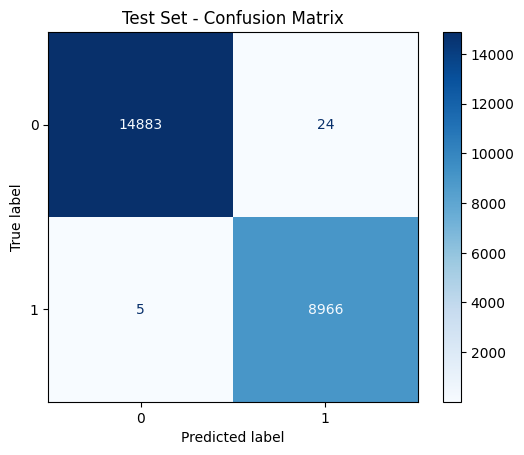

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Validation Set Performance Metrics:
Accuracy:  0.9991
Precision: 0.9981
Recall:    0.9995
F1 Score:  0.9988

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15140
           1       1.00      1.00      1.00      8738

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



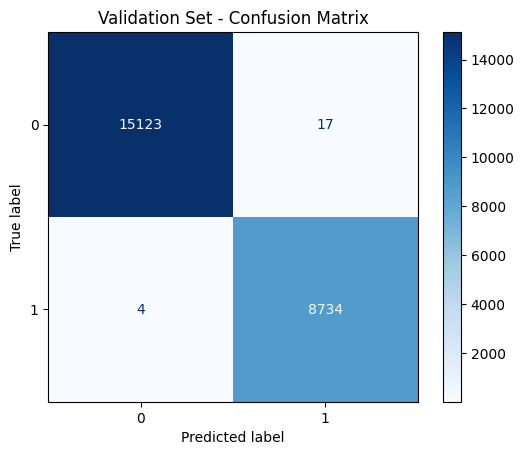

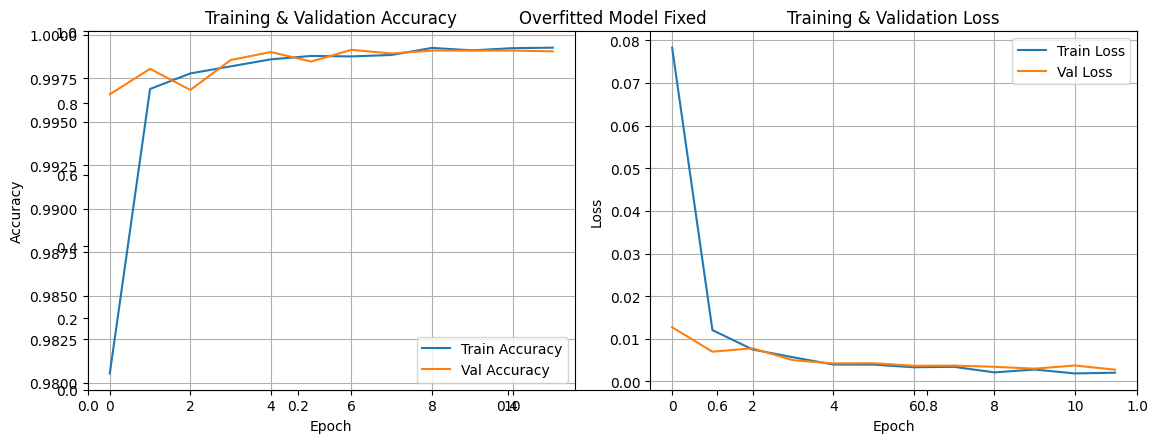

In [135]:
# 📍 Evaluate on Test Set
evaluate_and_display(X_test, y_test, "Test Set")

# 📍 Evaluate on Validation Set
evaluate_and_display(X_val, y_val, "Validation Set")

# 📈 Plot Training & Validation Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.title('Overfitted Model Fixed')
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 5 - Experiment with Batch Normalization

In [136]:
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=20,
    callbacks=[early_stopping],
)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - binary_accuracy: 0.9413 - loss: 0.1393 - val_binary_accuracy: 0.9959 - val_loss: 0.0109
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - binary_accuracy: 0.9954 - loss: 0.0123 - val_binary_accuracy: 0.9970 - val_loss: 0.0076
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - binary_accuracy: 0.9962 - loss: 0.0093 - val_binary_accuracy: 0.9977 - val_loss: 0.0062
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - binary_accuracy: 0.9974 - loss: 0.0063 - val_binary_accuracy: 0.9981 - val_loss: 0.0050
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - binary_accuracy: 0.9978 - loss: 0.0053 - val_binary_accuracy: 0.9986 - val_loss: 0.0050
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - binary_accuracy: 0.9987 - loss: 0.0034 - val_binary_accuracy: 0.9990 - val_loss: 0.0042
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - binary_accuracy: 0.9989 - loss: 0.0030 - val_binary_accuracy: 0.9988 - val_loss: 0

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Test Set Performance Metrics:
Accuracy:  0.9992
Precision: 0.9987
Recall:    0.9991
F1 Score:  0.9989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



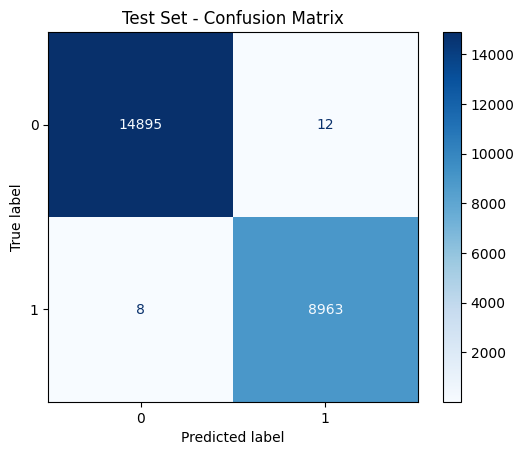

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Validation Set Performance Metrics:
Accuracy:  0.9993
Precision: 0.9991
Recall:    0.9991
F1 Score:  0.9991

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15140
           1       1.00      1.00      1.00      8738

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



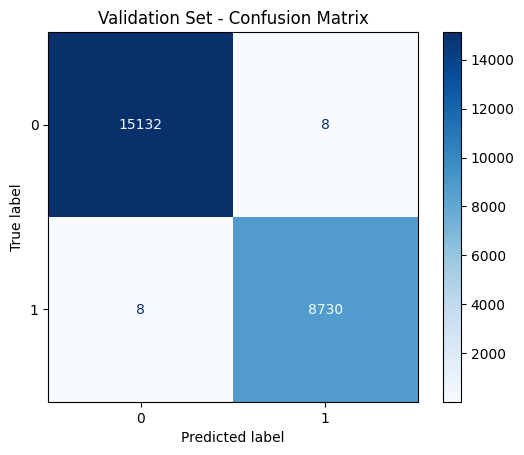

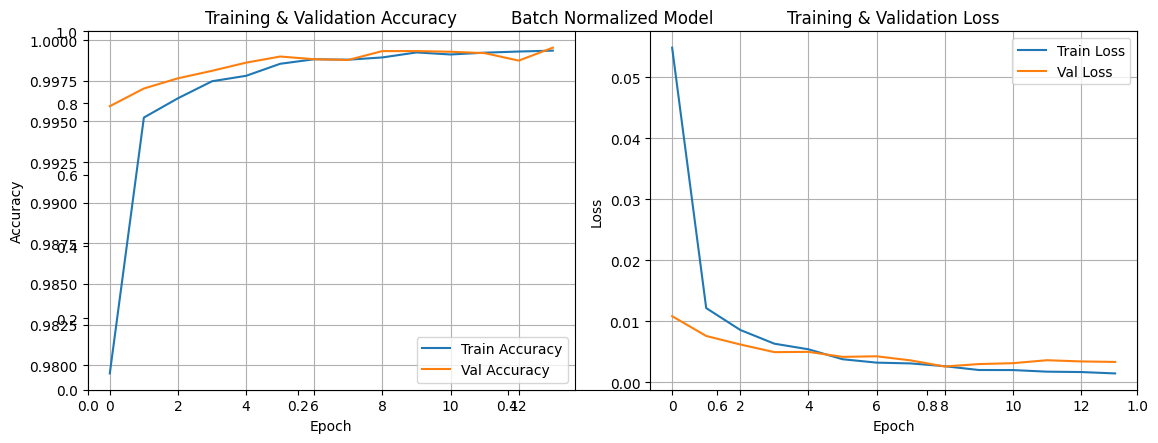

In [137]:
# 📍 Evaluate on Test Set
evaluate_and_display(X_test, y_test, "Test Set")

# 📍 Evaluate on Validation Set
evaluate_and_display(X_val, y_val, "Validation Set")

# 📈 Plot Training & Validation Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.title('Batch Normalized Model')
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6 -  Summary

## How I Diagnosed Each Problem and Their Solutions

### Underfitting

*   Small number of Layers
*   The layers were too simple (low number of neurons)
*   Low number of epochs
*   Low performance on training and validation sets

### Solution

*   Increase the number of layers
*   Increase the number of neurons
*   Increase the number of epochs

### Overfitting

*   High number of Layers
*   The layers were too complex (high number of neurons)
*   High number of epochs
*   Long runtimes
*   Validation error would decrease as epochs go on
*   Low performance on validation set

### Solution

*   Decrease the number of layers, neurons and epochs
*   Introduce dropout and early stopping




### Advice I would give my past self


1.   Select the appropriate number of layers, neurons and epochs
2.   Preemptively include dropout to prevent overfitting
3.   Include early stopping to save runtime and validation performance

